In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.style.use('seaborn')

from PIL import Image

In [2]:
# Please find the MVC json files at https://drive.google.com/drive/folders/0B0oMjGuurWR4ZVZ1X19veUkxeU0
# The image_links file only has images in HD (1920 x 2240), however the mvc_info file has links to smaller images
# Therefore image_links will not be used for now

attribute_labels = "attribute_labels.json"  #~590Mb
image_links = "image_links.json"            #~12Mb
mvc_info = "mvc_info.json"                  #~140Mb

## MVC Info File

In [21]:
df_mvc = pd.read_json(mvc_info)

In [22]:
print(df_mvc.shape)

(161260, 23)


In [23]:
df_mvc.head(2)

,brandId,brandName,catNum,category,colourId,colourName,image_4x_height,image_4x_width,image_url_2x,image_url_4x,...,productGender,productId,productName,productTypeId,styleId,subCategory1,subCategory2,total_style,viewId,zetaCategory
0,610,"""The North Face""",27563,"""Coats & Outerwear""",239449,Asphalt Grey Heather,2240,1920,http://www.zappos.com/images/z/3/1/6/3/7/1/316...,http://www.zappos.com/images/z/3/1/6/3/7/1/316...,...,"""Mens""",7258521,"""Apex Bionic Jacket""",2,3163710,"""Jackets and Coats""","""Jackets and Coats""",10,0,"{27563: u'Clothing', 27591: u'Coats & Outerwea'}"
1,610,"""The North Face""",27563,"""Coats & Outerwear""",239449,Asphalt Grey Heather,2240,1920,http://www.zappos.com/images/z/3/1/6/3/7/1/316...,http://www.zappos.com/images/z/3/1/6/3/7/1/316...,...,"""Mens""",7258521,"""Apex Bionic Jacket""",2,3163710,"""Jackets and Coats""","""Jackets and Coats""",10,1,"{27563: u'Clothing', 27591: u'Coats & Outerwea'}"


In [24]:
# Let´s have a quick look at the columns to check out which ones will be used

for column in df_mvc.columns:
    print(column ,'-> unique:', len(df_mvc[column].unique()), df_mvc[column].unique())
    print(100*'*')

brandId -> unique: 449 [ 610  613 1466 1425  334 1572  234 1583 1630 1745 1850  125 1960 1924 1783
 1632 1803 1902 1759 1996 1936 2078 2976 1975 2079  709 2304  643 2412 3026
 2293 1567 2505 2193  162  439 1867 3790 2534  326 1626 3573 3158 2522 1245
 2531 2975  111 1687 2621 3031 2634 2654 1772 1770 1519 2695 2714 1063 2958
 2761  171 1900 2803 3329 1560 1196 2833 2953  489  448 2569 1685 2067 1192
  382 2876 2265 2991 2960  453  877 2605 3065 3134  450  804 3184 3125 3387
 3265 1147 3185  369 1989 2772 3148  616 3113 1038  575 3108 3255 3324 3245
 3239 2615    1 3198 1577 3304 3305 1521 3312 2720 3322 3323 3326 2790 2896
 2601 1013 2993 2866 1923 3393 1128 3418 3492 3443  890 1048 3451 4028 3472
 3466 3463 2798 3491 3227 3489 3129 3502 3510 2387 1217 3365 3498  107 1983
  969 1532 3349 3618 3647 3154 2262 3701 1634 3602 3277 3728 2723 3739 2709
 2206  288 3775 3299 3749 2766 3429 3755 2256 3799 3040 3039 2239 3778 3803
   86 3023  605  403 1162 2119 3825 3601 2789 1977 3838 3829 2724

colourName -> unique: 9897 ['Asphalt Grey Heather' 'Asphalt Grey/Dark Eggplant Purple'
 'Cosmic Blue/Cosmic Blue' ..., 'Burgundy/Olive' 'Navy/Tan'
 'Medium Aged Destroy']
****************************************************************************************************
image_4x_height -> unique: 2 [2240 1440]
****************************************************************************************************
image_4x_width -> unique: 1 [1920]
****************************************************************************************************
image_url_2x -> unique: 161205 ['http://www.zappos.com/images/z/3/1/6/3/7/1/3163710-p-2x.jpg'
 'http://www.zappos.com/images/z/3/1/6/3/7/1/3163710-1-2x.jpg'
 'http://www.zappos.com/images/z/3/1/6/3/7/1/3163710-2-2x.jpg' ...,
 'http://www.zappos.com/images/z/3/5/4/8/6/5/3548654-1-2x.jpg'
 'http://www.zappos.com/images/z/3/5/4/8/6/5/3548654-2-2x.jpg'
 'http://www.zappos.com/images/z/3/5/4/8/6/5/3548654-3-2x.jpg']
***********************************

productName -> unique: 22271 ['"Apex Bionic Jacket"' '"Denali Jacket"' '"Venture Jacket"' ...,
 '"Color Block Ruffle Gown"' '"Pioneer Shirt"'
 '"Arc 3D Low Boyfriend Jeans in Watton Denim"']
****************************************************************************************************
productTypeId -> unique: 5 [2 5 8 1 6]
****************************************************************************************************
styleId -> unique: 37499 [3163710 3163713 3119732 ..., 3531907 3531913 3548654]
****************************************************************************************************
subCategory1 -> unique: 10 ['"Jackets and Coats"' '"Legwear"' '"Bottoms"' '"Tops"'
 '"Underwear and Intimates"' '"Sleepwear"' '"Swimwear"' '"Dresses"'
 '"Scarves"' '"Suits"']
****************************************************************************************************
subCategory2 -> unique: 23 ['"Jackets and Coats"' '"Legwear"' '"Pants"' '"Short Sleeve Tops"'
 '"Long Sleeve To

In [200]:
# after lookng at the columns/values we select the following categories

categories = ['category', 'colourId', 'colourName', 
              'productGender', 
              'subCategory1', 'subCategory2', 'zetaCategory', 'styleId', 'productId']

In [201]:
df_categories = df_mvc.loc[:,categories]

In [202]:
df_categories.head()

,category,colourId,colourName,productGender,subCategory1,subCategory2,zetaCategory,styleId,productId
0,"""Coats & Outerwear""",239449,Asphalt Grey Heather,"""Mens""","""Jackets and Coats""","""Jackets and Coats""","{27563: u'Clothing', 27591: u'Coats & Outerwea'}",3163710,7258521
1,"""Coats & Outerwear""",239449,Asphalt Grey Heather,"""Mens""","""Jackets and Coats""","""Jackets and Coats""","{27563: u'Clothing', 27591: u'Coats & Outerwea'}",3163710,7258521
2,"""Coats & Outerwear""",239449,Asphalt Grey Heather,"""Mens""","""Jackets and Coats""","""Jackets and Coats""","{27563: u'Clothing', 27591: u'Coats & Outerwea'}",3163710,7258521
3,"""Coats & Outerwear""",239449,Asphalt Grey Heather,"""Mens""","""Jackets and Coats""","""Jackets and Coats""","{27563: u'Clothing', 27591: u'Coats & Outerwea'}",3163710,7258521
4,"""Coats & Outerwear""",239449,Asphalt Grey Heather,"""Mens""","""Jackets and Coats""","""Jackets and Coats""","{27563: u'Clothing', 27591: u'Coats & Outerwea'}",3163710,7258521


#### Notes for the MVC_info file

- **category:** 10 unique values
- **colourId/Name:** 9919 unique values
- **image_url_multiView:** images with size of 480 × 560 pixels - 160,681 unique images
- **productGender:** 'Mens', 'Women, 'Unisex'
- **subCategory1:** 10 unique values
- **subCategory2:** 23 unique values
- **zetaCategory:** 31 unique values

## Labels file

In [50]:
df_labels = pd.read_json(attribute_labels)

In [51]:
print(df_labels.shape)

(161260, 266)


In [55]:
df_labels.head()

,AlineDresses,AnimalPrint,Anoraks,Argyle,Asymmetrical,Athletic,BabyDollDresses,BalconetteBras,Bandeau,BandeauBras,...,Zipper,fiftyU,filename,halfZip,hundred1U,hundred2O,hundred2U,itemN,quarter3Zip,quarterZip
0,0,0,0,0,0,0,0,0,0,0,...,0,0,p7258521_s3163710_v0,0,0,0,1,3163710.0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,p7258521_s3163710_v1,0,0,0,1,3163710.0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,p7258521_s3163710_v2,0,0,0,1,3163710.0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,p7258521_s3163710_v3,0,0,0,1,3163710.0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,p7258521_s3163710_v4,0,0,0,1,3163710.0,0,0


In [6]:
# Let´s have a quick look at the labels

for column in df_labels.columns:
    print(column ,'-> unique:', len(df_labels[column].unique()), df_labels[column].unique())
    print(100*'*')

AlineDresses -> unique: 2 [0 1]
****************************************************************************************************
AnimalPrint -> unique: 2 [0 1]
****************************************************************************************************
Anoraks -> unique: 2 [0 1]
****************************************************************************************************
Argyle -> unique: 2 [0 1]
****************************************************************************************************
Asymmetrical -> unique: 2 [0 1]
****************************************************************************************************
Athletic -> unique: 2 [0 1]
****************************************************************************************************
BabyDollDresses -> unique: 2 [0 1]
****************************************************************************************************
BalconetteBras -> unique: 2 [0 1]
************************************************

DemiBras -> unique: 2 [0 1]
****************************************************************************************************
Denim -> unique: 2 [0 1]
****************************************************************************************************
DolmanSleeve -> unique: 2 [0 1]
****************************************************************************************************
Embossed -> unique: 2 [0 1]
****************************************************************************************************
Embroidered -> unique: 2 [0 1]
****************************************************************************************************
EmpireDresses -> unique: 2 [0 1]
****************************************************************************************************
EnhancedBras -> unique: 2 [0 1]
****************************************************************************************************
FieldJacket -> unique: 2 [0 1]
*****************************************************

****************************************************************************************************
Polos -> unique: 2 [0 1]
****************************************************************************************************
Polyester -> unique: 2 [1 0]
****************************************************************************************************
PullOn -> unique: 2 [0 1]
****************************************************************************************************
Pullover -> unique: 2 [0 1]
****************************************************************************************************
Purple -> unique: 2 [0 1]
****************************************************************************************************
PushUpBras -> unique: 2 [0 1]
****************************************************************************************************
Racerback -> unique: 2 [0 1]
****************************************************************************************************

UltraLowRise -> unique: 2 [0 1]
****************************************************************************************************
UnderwireBras -> unique: 2 [0 1]
****************************************************************************************************
Unlined -> unique: 2 [0 1]
****************************************************************************************************
Velour -> unique: 2 [0 1]
****************************************************************************************************
Velvet -> unique: 2 [0 1]
****************************************************************************************************
VerticalStripes -> unique: 2 [0 1]
****************************************************************************************************
Vests -> unique: 2 [0 1]
****************************************************************************************************
Vneck -> unique: 2 [0 1]
****************************************************************

In [7]:
df_labels.shape

(161260, 266)

In [8]:
df_labels.columns.values

array(['AlineDresses', 'AnimalPrint', 'Anoraks', 'Argyle', 'Asymmetrical',
       'Athletic', 'BabyDollDresses', 'BalconetteBras', 'Bandeau',
       'BandeauBras', 'Banded', 'Beaded', 'Beige', 'Black', 'Blouses',
       'Blue', 'BoardShorts', 'Boatneck', 'BomberJackets', 'BootCut',
       'BoxerBriefs', 'Boxers', 'BoyShorts', 'BoyfriendFit',
       'BraletteBras', 'Bras', 'Brief', 'Brocade', 'Bronze', 'Brown',
       'Burgundy', 'BustierDresses', 'ButtonUpShirts', 'Buttondown',
       'Buttons', 'Camis', 'Camisoles', 'Camo', 'Capes', 'CapriPants',
       'Cardigans', 'CargoPants', 'Cashmere', 'Chains', 'Chambray',
       'Checkered', 'CheetahPrint', 'Chenille', 'Chevron', 'Chiffon',
       'Chino', 'CoatDresses', 'Coated', 'Compression', 'CompressionBras',
       'CompressionPants', 'ContrastStitching', 'ConvertibleBras',
       'ConvertiblePants', 'Coral', 'Corset', 'Cotton', 'CoverUpDresses',
       'CoverUps', 'Coveralls', 'Cowl', 'Crew', 'Crochet', 'Cropped',
       'CroppedJackets

#### Notes for Labels file

- We need to find the relevant labels that we will use
- I cannot find a column that can be realated to the MVC info file so we may have to use the index as the reference

## Colors and Gender tables

In [10]:
colors = ['Beige', 'Black', 'Blue', 'Bronze', 'Brown', 'Burgundy',
          'Coral', 'Gold', 'Gray', 'Green', 'Olive', 'Orange', 'Pink', 'Purple',
          'Red', 'Silver', 'White', 'Yellow', 'filename', 'itemN']

print(len(colors)-2)

18


In [53]:
df_labels.shape

(161260, 266)

In [109]:
#dropping duplicate photos
df_colors = df_labels[colors].drop_duplicates(subset="itemN", keep="first", inplace=False)

#converting itemN column to integer (rounded first to avoid missconversion)
df_colors.itemN = df_colors.itemN.round().astype(int)
print(df_colors.shape)

(37499, 20)


In [110]:
df_colors.head()

,Beige,Black,Blue,Bronze,Brown,Burgundy,Coral,Gold,Gray,Green,Olive,Orange,Pink,Purple,Red,Silver,White,Yellow,filename,itemN
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,p7258521_s3163710_v0,3163710
5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,p7258521_s3163713_v0,3163713
10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,p7258521_s3119732_v0,3119732
15,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,p7258521_s2696572_v0,2696572
20,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,p7258521_s3119730_v0,3119730


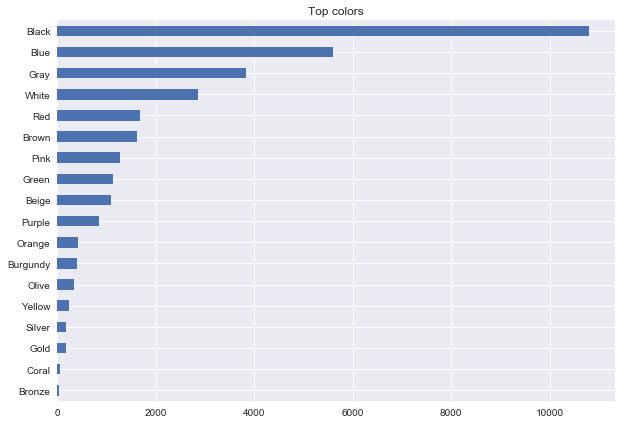

In [111]:
df_colors.drop(['filename', 'itemN'], axis=1).sum(axis=0).sort_values().plot(kind="barh", 
                                                                             figsize=(10,7), 
                                                                             title="Top colors")
plt.show()

In [112]:
# the sum of all these colors values should be 37,499
df_colors.drop(['filename', 'itemN'], axis=1).sum(axis=0).sort_values(ascending=False)

Black       10793
Blue         5600
Gray         3829
White        2861
Red          1679
Brown        1610
Pink         1269
Green        1140
Beige        1099
Purple        854
Orange        422
Burgundy      391
Olive         343
Yellow        242
Silver        175
Gold          171
Coral          45
Bronze         33
dtype: int64

In [113]:
# these rows do have at least one color - 32,556
df_colors.drop(['filename', 'itemN'] , axis=1).sum(axis=1).sum()

32556

In [114]:
# these rows do not have any color ? - 4,943
df_colors[df_colors.drop(['filename', 'itemN'], axis=1).sum(axis=1) == 0].head()

,Beige,Black,Blue,Bronze,Brown,Burgundy,Coral,Gold,Gray,Green,Olive,Orange,Pink,Purple,Red,Silver,White,Yellow,filename,itemN
98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,p7258531_s2988598_v0,2988598
107,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,p7278918_s3235213_v0,3235213
137,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,p7290291_s2067888_v0,2067888
180,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,p7275804_s1839939_v0,1839939
204,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,p7293958_s364839_v0,364839


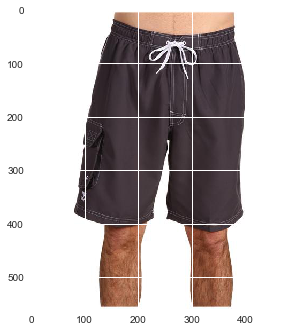

In [17]:
img = mpimg.imread('./images/images_selected/p7442984_s1781961_v0.jpg')
imgplot = plt.imshow(img)
plt.show()

In [63]:
df_categories[df_categories['styleId'] == 2988598]

,category,colourId,colourName,productGender,subCategory1,subCategory2,zetaCategory,styleId
98,"""Coats & Outerwear""",274353,TNF White,"""Womens""","""Jackets and Coats""","""Jackets and Coats""","{27563: u'Clothing', 27591: u'Coats & Outerwea'}",2988598
99,"""Coats & Outerwear""",274353,TNF White,"""Womens""","""Jackets and Coats""","""Jackets and Coats""","{27563: u'Clothing', 27591: u'Coats & Outerwea'}",2988598
100,"""Coats & Outerwear""",274353,TNF White,"""Womens""","""Jackets and Coats""","""Jackets and Coats""","{27563: u'Clothing', 27591: u'Coats & Outerwea'}",2988598
101,"""Coats & Outerwear""",274353,TNF White,"""Womens""","""Jackets and Coats""","""Jackets and Coats""","{27563: u'Clothing', 27591: u'Coats & Outerwea'}",2988598
102,"""Coats & Outerwear""",274353,TNF White,"""Womens""","""Jackets and Coats""","""Jackets and Coats""","{27563: u'Clothing', 27591: u'Coats & Outerwea'}",2988598


## Gender exploration

In [160]:
gender = ['productGender', 'styleId']
df_gender = df_mvc[gender].drop_duplicates(subset="styleId", keep="first", inplace=False)
print(df_gender.shape)

(37499, 2)


In [161]:
df_gender.head()

,productGender,styleId
0,"""Mens""",3163710
5,"""Mens""",3163713
10,"""Mens""",3119732
15,"""Mens""",2696572
20,"""Mens""",3119730


In [162]:
df_gender.groupby('productGender').count().sort_values(by='styleId')

,styleId
productGender,
"""Unisex""",14
"""Mens""",13170
"""Womens""",24315


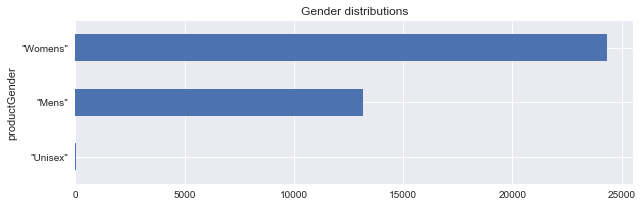

In [163]:
df_gender.groupby('productGender').count().sort_values(by='styleId').plot(kind="barh", 
                                                                          figsize=(10,3), 
                                                                          title="Gender distributions",
                                                                         legend=None)
plt.show()

## Extract and resize images

The function below extracts one views of the images from the main MVC folder to /img_selected. <br>
It also resizes the image from it´s original resolution to the specified one.

In [19]:
import os
from os import listdir
from PIL import Image

In [51]:
def extract_resize(view, resize=0.25):
    """view: select which view you would like to extract '_v0' """
    
    img_mvc = "./images/mvc/"
    img_selected = "./images/images_selected/"
    
    if not os.path.exists(img_selected):
        os.mkdir(img_selected)
    
    files = [f for f in listdir(img_mvc) if f.endswith((view +'.jpg'))]
        
    for img in files:
        img_org = Image.open(img_mvc+img)
        
        # get the size of the original image
        width_org, height_org = img_org.size
        
        # set the resizing factor so the aspect ratio can be retained
        factor = resize
        width = int(width_org * factor)
        height = int(height_org * factor)
        
        # best down-sizing filter
        img_anti = img_org.resize((width, height), Image.ANTIALIAS)

        img_anti.save(img_selected+img)
        
        #copyfile(img_mvc+img, img_selected+img)

In [52]:
extract_resize("_v0")